In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

In [6]:
path =  'ex2data2.txt'
Data = pd.read_csv(path, header=None, names=['Test 1', 'Test 2', 'Accepted'])
Data.head()

,Test 1,Test 2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


## 模型选择和交叉验证集误差
将数据的随机分为三个部分，分别为training set, cross validation set(cv)和test set，测试不同degree的多项式的模型的拟合能力和泛化能力。使用训练集训练数据，使用交叉验证集验证模型的泛化能力，计算出cv的error，挑选具有最小的error的多项式并用test set测试模型的泛化能力。
第一步是数据预处理和生成多项式特征

In [9]:
def generating_polynomial(data, degree):
    x1 = data['Test 1']
    x2 = data['Test 2']
    data = data.copy()
    
    # 插入一列常数项
    data.insert(3, 'Ones', 1)
    
    # 生成多项式特征
    for i in range(1, degree):
        for j in range(0, i):
            data['F' + str(i) + str(j)] = np.power(x1, i-j) * np.power(x2, j)
    
    # 删除原始特征列
    data.drop('Test 1', axis=1, inplace=True)
    data.drop('Test 2', axis=1, inplace=True)
    
    X = data[:, 1:]
    y = data[:, 0]
    return X, y

In [10]:
data = generating_polynomial(data=Data, degree=3)
data.head()

,Accepted,Ones,F10,F20,F21
0,1,1,0.051267,0.002628,0.035864
1,1,1,-0.092742,0.008601,-0.063523
2,1,1,-0.213710,0.045672,-0.147941
3,1,1,-0.375000,0.140625,-0.188321
4,1,1,-0.513250,0.263426,-0.238990


接下来划分数据集，将数据集划分为三个部分

In [35]:
def model_selection(data, degrees):
    X = np.asarray(data[['Test 1', 'Test 2']])
    y = np.asarray(data['Accepted']).flatten()
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
    X_cv, X_test, y_cv, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
    
    train_errors = []
    cv_errors = []
    
    for degree in range(2, degrees + 1):
        poly = PolynomialFeatures(degree)
        X_train_poly = poly.fit_transform(X_train)
        X_cv_poly = poly.transform(X_cv)
        
        # 训练线性回归模型
        model = LogisticRegression()
        model.fit(X_train_poly, y_train)
        
        # 计算训练误差和测试误差
        y_train_pred = model.predict(X_train_poly)
        y_cv_pred = model.predict(X_cv_poly)
        
        train_error = log_loss(y_train, y_train_pred)
        cv_error = log_loss(y_cv, y_cv_pred)
        
        train_errors.append(train_error)
        cv_errors.append(cv_error)
    
    return train_errors, cv_errors

In [38]:
X = Data[['Test 1', 'Test 2']]
y = Data['Accepted']
d = 30
Train_errors, Cv_errors = model_selection(Data, degrees=d)

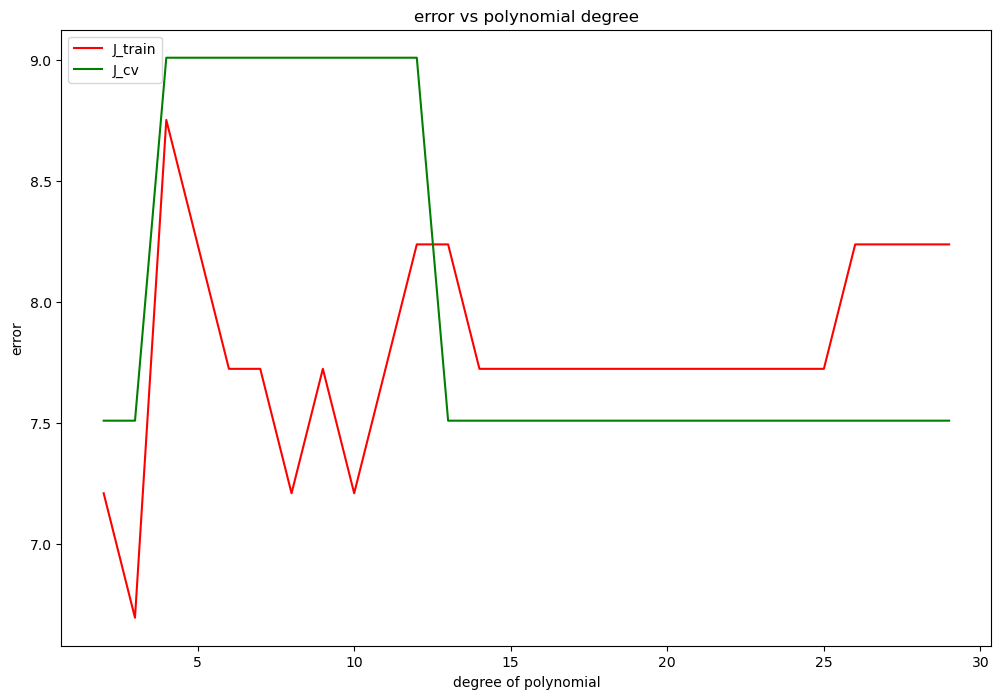

In [41]:
fig, ax = plt.subplots(figsize = (12, 8))

x = [[num for num in range(2, d)]]
x = np.asarray(x).flatten()
ax.set(xlabel='degree of polynomial', ylabel='error', title='error vs polynomial degree')
ax.plot(x, Train_errors, label = 'J_train', color='r')
ax.plot(x, Cv_errors, label = 'J_cv', color='g')
ax.legend(loc=2)
plt.show()